# Filtering Rows

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 4, 'max_rows', 10, 'max_colwidth', 12)

## Introduction

## Calculating boolean statistics

### How to do it...

In [2]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie[['duration']].head()

,duration
movie_title,
Avatar,178.0
Pirates of the Caribbean: At World's End,169.0
Spectre,148.0
The Dark Knight Rises,164.0
Star Wars: Episode VII - The Force Awakens,NaN


In [3]:
movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [4]:
movie_2_hours.sum()

1039

In [5]:
movie_2_hours.mean()

0.2113506916192026

In [6]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [7]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

### How it works...

In [8]:
movie_2_hours.value_counts(normalize=True)

False    0.788649
True     0.211351
Name: duration, dtype: float64

In [9]:
movie_2_hours.astype(int).describe()

count    4916.000000
mean        0.211351
std         0.408308
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: duration, dtype: float64

### There's more...

In [10]:
actors = movie[['actor_1_facebook_likes',
   'actor_2_facebook_likes']].dropna()
(actors['actor_1_facebook_likes'] >
      actors['actor_2_facebook_likes']).mean()

0.9777687130328371

## Constructing multiple boolean conditions

### How to do it...

In [11]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

In [12]:
criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = ((movie.title_year < 2000) |
   (movie.title_year > 2009))

In [13]:
criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

### How it works...

### There's more...

In [14]:
5 < 10 and 3 > 4

False

In [15]:
5 < 10 and 3 > 4

False

In [16]:
True and 3 > 4

False

In [17]:
True and False

False

In [18]:
False

False

In [19]:
(movie.title_year < 2000) | (movie.title_year > 2009)

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
                                              ...  
Signed Sealed Delivered                        True
The Following                                 False
A Plague So Pleasant                           True
Shanghai Calling                               True
My Date with Drew                             False
Name: title_year, Length: 4916, dtype: bool

## Filtering with boolean arrays

### How to do it...

In [20]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [21]:
crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = ((movie.title_year >= 2000) &
(movie.title_year <= 2010))
final_crit_b = crit_b1 & crit_b2 & crit_b3

In [22]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [23]:
movie[final_crit_all].head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
The Dark Knight Rises,Color,Christop...,...,2.35,164000
The Avengers,Color,Joss Whedon,...,1.85,123000
Captain America: Civil War,Color,Anthony ...,...,2.35,72000
Guardians of the Galaxy,Color,James Gunn,...,2.35,96000
Interstellar,Color,Christop...,...,2.35,349000


In [24]:
movie.loc[final_crit_all].head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
The Dark Knight Rises,Color,Christop...,...,2.35,164000
The Avengers,Color,Joss Whedon,...,1.85,123000
Captain America: Civil War,Color,Anthony ...,...,2.35,72000
Guardians of the Galaxy,Color,James Gunn,...,2.35,96000
Interstellar,Color,Christop...,...,2.35,349000


In [25]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


### How it works...

In [26]:
movie.iloc[final_crit_all]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [ ]:
movie.iloc[final_crit_all.values]

### There's more...

In [ ]:
final_crit_a2 = ((movie.imdb_score > 8) & 
   (movie.content_rating == 'PG-13') & 
   ((movie.title_year < 2000) |
    (movie.title_year > 2009))
)
final_crit_a2.equals(final_crit_a)

## Comparing Row Filtering and Index Filtering

### How to do it...

In [ ]:
college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()

In [ ]:
college2 = college.set_index('STABBR')
college2.loc['TX'].head()

In [27]:
%timeit college[college['STABBR'] == 'TX']

NameError: name 'college' is not defined

In [ ]:
%timeit college2.loc['TX']

In [ ]:
%timeit college2 = college.set_index('STABBR')

### How it works...

### There's more...

In [28]:
states = ['TX', 'CA', 'NY']
college[college['STABBR'].isin(states)]

NameError: name 'college' is not defined

In [ ]:
college2.loc[states]

## Selecting with unique and sorted indexes

### How to do it...

In [29]:
college = pd.read_csv('data/college.csv')
college2 = college.set_index('STABBR')
college2.index.is_monotonic

False

In [30]:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [31]:
%timeit college[college['STABBR'] == 'TX']

1.19 ms ± 51.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%timeit college2.loc['TX']

519 µs ± 46 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%timeit college3.loc['TX']

62.6 µs ± 3.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [35]:
college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford...,Stanford,...,86000,12782


In [36]:
college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
                        ...   
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, Length: 26, dtype: object

In [37]:
college_unique.loc[['Stanford University']]

,CITY,STABBR,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
INSTNM,,,,,
Stanford University,Stanford,CA,...,86000,12782


In [38]:
%timeit college[college['INSTNM'] == 'Stanford University']

849 µs ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit college_unique.loc[['Stanford University']]

349 µs ± 17.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### How it works...

### There's more...

In [40]:
college.index = college['CITY'] + ', ' + college['STABBR']
college = college.sort_index()
college.head()

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"ARTESIA, CA",Angeles ...,ARTESIA,...,NaN,16850
"Aberdeen, SD",Presenta...,Aberdeen,...,35900,25000
"Aberdeen, SD",Northern...,Aberdeen,...,33600,24847
"Aberdeen, WA",Grays Ha...,Aberdeen,...,27000,11490
"Abilene, TX",Hardin-S...,Abilene,...,38700,25864


In [41]:
college.loc['Miami, FL'].head()

,INSTNM,CITY,...,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
"Miami, FL",New Prof...,Miami,...,18700,8682
"Miami, FL",Manageme...,Miami,...,PrivacyS...,12182
"Miami, FL",Strayer ...,Miami,...,49200,36173.5
"Miami, FL",Keiser U...,Miami,...,29700,26063
"Miami, FL",George T...,Miami,...,38600,PrivacyS...


In [42]:
%%timeit
crit1 = college['CITY'] == 'Miami'
crit2 = college['STABBR'] == 'FL'
college[crit1 & crit2]

1.64 ms ± 72.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [43]:
%timeit college.loc['Miami, FL']

57.9 µs ± 2.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Translating SQL WHERE clauses

### How to do it...

In [44]:
employee = pd.read_csv('data/employee.csv')

In [45]:
employee.dtypes

UNIQUE_ID              int64
POSITION_TITLE        object
DEPARTMENT            object
BASE_SALARY          float64
RACE                  object
EMPLOYMENT_TYPE       object
GENDER                object
EMPLOYMENT_STATUS     object
HIRE_DATE             object
JOB_DATE              object
dtype: object

In [46]:
employee.DEPARTMENT.value_counts().head()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           110
Houston Airport System (HAS)      106
Name: DEPARTMENT, dtype: int64

In [47]:
employee.GENDER.value_counts()

Male      1397
Female     603
Name: GENDER, dtype: int64

In [48]:
employee.BASE_SALARY.describe()

count    1886.000000
mean     55767.93...
std      21693.70...
min      24960.00...
25%      40170.00...
50%      54461.00...
75%      66614.00...
max      275000.0...
Name: BASE_SALARY, dtype: float64

In [49]:
depts = ['Houston Police Department-HPD',
   'Houston Fire Department (HFD)']
criteria_dept = employee.DEPARTMENT.isin(depts)
criteria_gender = employee.GENDER == 'Female'
criteria_sal = ((employee.BASE_SALARY >= 80000) & 
   (employee.BASE_SALARY <= 120000))

In [50]:
criteria_final = (criteria_dept &
   criteria_gender &
   criteria_sal)

In [51]:
select_columns = ['UNIQUE_ID', 'DEPARTMENT',
                  'GENDER', 'BASE_SALARY']
employee.loc[criteria_final, select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston ...,Female,96668.0
136,136,Houston ...,Female,81239.0
367,367,Houston ...,Female,86534.0
474,474,Houston ...,Female,91181.0
513,513,Houston ...,Female,81239.0


### How it works...

### There's more...

In [52]:
criteria_sal = employee.BASE_SALARY.between(80_000, 120_000)

In [53]:
top_5_depts = employee.DEPARTMENT.value_counts().index[:5]
criteria = ~employee.DEPARTMENT.isin(top_5_depts)
employee[criteria]

,UNIQUE_ID,POSITION_TITLE,...,HIRE_DATE,JOB_DATE
0,0,ASSISTAN...,...,2006-06-12,2012-10-13
1,1,LIBRARY ...,...,2000-07-19,2010-09-18
4,4,ELECTRICIAN,...,1989-06-19,1994-10-22
18,18,MAINTENA...,...,2008-12-29,2008-12-29
32,32,SENIOR A...,...,1991-02-11,2016-02-13
...,...,...,...,...,...
1976,1976,SENIOR S...,...,2015-07-20,2016-01-30
1983,1983,ADMINIST...,...,2006-10-16,2006-10-16
1985,1985,TRUCK DR...,...,2013-06-10,2015-08-01
1988,1988,SENIOR A...,...,2013-01-23,2013-03-02


## Improving readability of boolean indexing with the query method

### How to do it...

In [54]:
employee = pd.read_csv('data/employee.csv')
depts = ['Houston Police Department-HPD',
         'Houston Fire Department (HFD)']
select_columns = ['UNIQUE_ID', 'DEPARTMENT',
                  'GENDER', 'BASE_SALARY']

In [55]:
qs = "DEPARTMENT in @depts "\
     " and GENDER == 'Female' "\
     " and 80000 <= BASE_SALARY <= 120000"
emp_filtered = employee.query(qs)
emp_filtered[select_columns].head()

,UNIQUE_ID,DEPARTMENT,GENDER,BASE_SALARY
61,61,Houston ...,Female,96668.0
136,136,Houston ...,Female,81239.0
367,367,Houston ...,Female,86534.0
474,474,Houston ...,Female,91181.0
513,513,Houston ...,Female,81239.0


### How it works...

### There's more...

In [56]:
top10_depts = (employee.DEPARTMENT.value_counts() 
   .index[:10].tolist()
)
qs = "DEPARTMENT not in @top10_depts and GENDER == 'Female'"
employee_filtered2 = employee.query(qs)
employee_filtered2.head()

,UNIQUE_ID,POSITION_TITLE,...,HIRE_DATE,JOB_DATE
0,0,ASSISTAN...,...,2006-06-12,2012-10-13
73,73,ADMINIST...,...,2011-12-19,2013-11-23
96,96,ASSISTAN...,...,2013-06-10,2013-06-10
117,117,SENIOR A...,...,1998-03-20,2012-07-21
146,146,SENIOR S...,...,2014-03-17,2014-03-17


## Preserving Series size with the where method

### How to do it...

In [57]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
fb_likes = movie['actor_1_facebook_likes'].dropna()
fb_likes.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      40000.0
Spectre                                       11000.0
The Dark Knight Rises                         27000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [58]:
fb_likes.describe()

count    4909.000000
mean     6494.488491
std      15106.98...
min         0.000000
25%       607.000000
50%       982.000000
75%      11000.00...
max      640000.0...
Name: actor_1_facebook_likes, dtype: float64

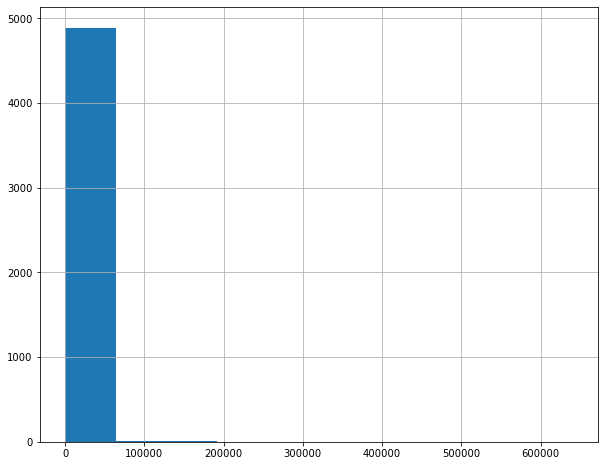

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
fb_likes.hist(ax=ax)
fig.savefig('/tmp/c7-hist.png', dpi=300)     # doctest: +SKIP

In [60]:
criteria_high = fb_likes < 20_000
criteria_high.mean().round(2)

0.91

In [61]:
fb_likes.where(criteria_high).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End          NaN
Spectre                                       11000.0
The Dark Knight Rises                             NaN
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [62]:
fb_likes.where(criteria_high, other=20000).head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      131.0
Name: actor_1_facebook_likes, dtype: float64

In [63]:
criteria_low = fb_likes > 300
fb_likes_cap = (fb_likes
   .where(criteria_high, other=20_000)
   .where(criteria_low, 300)
)
fb_likes_cap.head()

movie_title
Avatar                                         1000.0
Pirates of the Caribbean: At World's End      20000.0
Spectre                                       11000.0
The Dark Knight Rises                         20000.0
Star Wars: Episode VII - The Force Awakens      300.0
Name: actor_1_facebook_likes, dtype: float64

In [64]:
len(fb_likes), len(fb_likes_cap)

(4909, 4909)

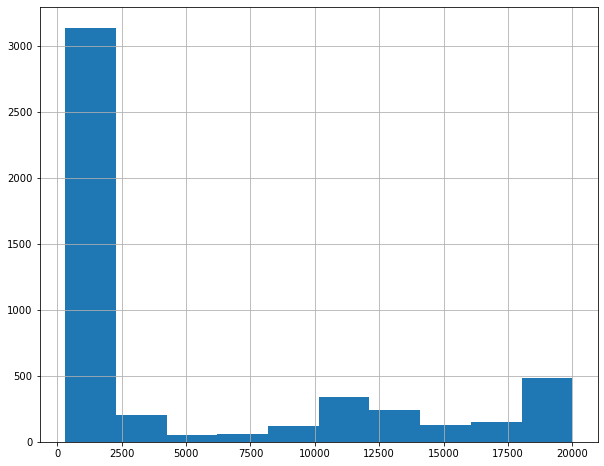

In [65]:
fig, ax = plt.subplots(figsize=(10, 8))
fb_likes_cap.hist(ax=ax)
fig.savefig('/tmp/c7-hist2.png', dpi=300)     # doctest: +SKIP

### How it works...

### There's more...

In [66]:
fb_likes_cap2 = fb_likes.clip(lower=300, upper=20000)
fb_likes_cap2.equals(fb_likes_cap)

True

## Masking DataFrame rows

### How to do it...

In [67]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
c1 = movie['title_year'] >= 2010
c2 = movie['title_year'].isna()
criteria = c1 | c2

In [68]:
movie.mask(criteria).head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Ca...,...,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Ver...,...,2.35,0.0
Spectre,NaN,NaN,...,NaN,NaN
The Dark Knight Rises,NaN,NaN,...,NaN,NaN
Star Wars: Episode VII - The Force Awakens,NaN,NaN,...,NaN,NaN


In [69]:
movie_mask = (movie
    .mask(criteria)
    .dropna(how='all')
)
movie_mask.head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
Avatar,Color,James Ca...,...,1.78,33000.0
Pirates of the Caribbean: At World's End,Color,Gore Ver...,...,2.35,0.0
Spider-Man 3,Color,Sam Raimi,...,2.35,0.0
Harry Potter and the Half-Blood Prince,Color,David Yates,...,2.35,10000.0
Superman Returns,Color,Bryan Si...,...,2.35,0.0


In [70]:
movie_boolean = movie[movie['title_year'] < 2010]
movie_mask.equals(movie_boolean)

False

In [71]:
movie_mask.shape == movie_boolean.shape

True

In [72]:
movie_mask.dtypes == movie_boolean.dtypes

color                       True
director_name               True
num_critic_for_reviews      True
duration                    True
director_facebook_likes     True
                           ...  
title_year                  True
actor_2_facebook_likes      True
imdb_score                  True
aspect_ratio                True
movie_facebook_likes       False
Length: 27, dtype: bool

In [73]:
from pandas.testing import assert_frame_equal
assert_frame_equal(movie_boolean, movie_mask,
       check_dtype=False)

### How it works...

### There's more...

In [74]:
%timeit movie.mask(criteria).dropna(how='all')

11.7 ms ± 510 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [75]:
%timeit movie[movie['title_year'] < 2010]

1.42 ms ± 63.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Selecting with booleans, integer location, and labels

### How to do it...

In [76]:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
c1 = movie['content_rating'] == 'G'
c2 = movie['imdb_score'] < 4
criteria = c1 & c2

In [77]:
movie_loc = movie.loc[criteria]
movie_loc.head()

,color,director_name,...,aspect_ratio,movie_facebook_likes
movie_title,,,,,
The True Story of Puss'N Boots,Color,Jérôme D...,...,NaN,90
Doogal,Color,Dave Bor...,...,1.85,346
Thomas and the Magic Railroad,Color,Britt Al...,...,1.85,663
Barney's Great Adventure,Color,Steve Gomer,...,1.85,436
Justin Bieber: Never Say Never,Color,Jon M. Chu,...,1.85,62000


In [78]:
movie_loc.equals(movie[criteria])

True

In [79]:
movie_iloc = movie.iloc[criteria]

ValueError: iLocation based boolean indexing cannot use an indexable as a mask

In [80]:
movie_iloc = movie.iloc[criteria.values]
movie_iloc.equals(movie_loc)

True

In [81]:
criteria_col = movie.dtypes == np.int64
criteria_col.head()

color                      False
director_name              False
num_critic_for_reviews     False
duration                   False
director_facebook_likes    False
dtype: bool

In [82]:
movie.loc[:, criteria_col].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [83]:
movie.iloc[:, criteria_col.values].head()

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
movie_title,,,
Avatar,886204,4834,33000
Pirates of the Caribbean: At World's End,471220,48350,0
Spectre,275868,11700,85000
The Dark Knight Rises,1144337,106759,164000
Star Wars: Episode VII - The Force Awakens,8,143,0


In [84]:
cols = ['content_rating', 'imdb_score', 'title_year', 'gross']
movie.loc[criteria, cols].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


In [85]:
col_index = [movie.columns.get_loc(col) for col in cols]
col_index

[20, 24, 22, 8]

In [86]:
movie.iloc[criteria.values, col_index].sort_values('imdb_score')

,content_rating,imdb_score,title_year,gross
movie_title,,,,
Justin Bieber: Never Say Never,G,1.6,2011.0,73000942.0
Sunday School Musical,G,2.5,2008.0,NaN
Doogal,G,2.8,2006.0,7382993.0
Barney's Great Adventure,G,2.8,1998.0,11144518.0
The True Story of Puss'N Boots,G,2.9,2009.0,NaN
Thomas and the Magic Railroad,G,3.6,2000.0,15911333.0


### How it works...

In [87]:
a = criteria.values
a[:5]

array([False, False, False, False, False])

In [88]:
len(a), len(criteria)

(4916, 4916)

In [89]:
movie.select_dtypes(int)

""
movie_title
Avatar
Pirates of the Caribbean: At World's End
Spectre
The Dark Knight Rises
Star Wars: Episode VII - The Force Awakens
...
Signed Sealed Delivered
The Following
A Plague So Pleasant
